# Brief Overview of the Notebook

Authors: Aayush Kumar, Naman Rastogi, Sagar Billore

Description:

There are many problems faced nowadays by car manufacturing companies which make automated cars. One of them being moving over animals without predicting them accurately. This can cause a lot of road accidents if the model is not appropriately optimized. 
Henceforth, we are trying to build up a model which will classify animals and accoridingly the automated car can take its action, whether to stop or to move forward by taking a different route. 

#Regarding the dataset:

We've made our own dataset which comprises of 6 Classes, in total having around 1200 images.

Prerequesites:

1.Create below folders

a)Training_Set
b)Test_Set

2.Preprocess: resize the image as well as convert the image into RGB/Greyscale 

3.Models: created CNN Models 

4.Comparison of Models using Tensorboard

5.Predicting the classes

6.Challenges faced while predicting.


In [13]:
from PIL import Image
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.callbacks import TensorBoard
import keras
from keras.utils import np_utils
import time

# Preprocessing

We're using Datagenerator to load the images into training set.
Resizing the images.
Converting them to RGB/Greyscale

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 100
train_set = train_datagen.flow_from_directory('./Training/',target_size=(150,150),class_mode='categorical' ,color_mode='grayscale',
                                              batch_size = batch_size, shuffle=True, seed = 42)

Found 1202 images belonging to 6 classes.


In [15]:
train_set.class_indices

{'Cow': 0, 'Deer': 1, 'Elephant': 2, 'Kangaroo': 3, 'Tiger': 4, 'Wolf': 5}

# Classes:

Cow,
 Deer,
 Elephant,
 Kangaroo,
 Tiger,
 Wolf

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 100
test_set = train_datagen.flow_from_directory('./Test/',target_size=(150,150),class_mode='categorical',color_mode='grayscale',
                                             batch_size = batch_size)

Found 12 images belonging to 6 classes.


In [17]:
train_set.image_shape

(150, 150, 1)

# Model 1 CNN

In [6]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu",input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu", dilation_rate = (1,1)))
model.add(MaxPooling2D(pool_size=2))



model.add(Flatten())
model.add(Dense(6,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
__________

In [7]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
model.save('model3.h5')
NAME = "Test3-grayscale".format(int(time.time()))
tensorboard = TensorBoard(log_dir='C://Users/aayus/logs/{}'.format(NAME),write_grads=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.30)
sess = tf.Session(config=tf.ConfigProto(gpu_options = gpu_options))

In [8]:
model.fit_generator(train_set,steps_per_epoch=20,epochs=3,validation_data=test_set,validation_steps=50,callbacks=[tensorboard])

Epoch 1/3
 3/20 [===>..........................] - ETA: 45s - loss: 1.7769 - acc: 0.1867

C:\Users\aayus\Anaconda3\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 111s 6s/step - loss: 1.7718 - acc: 0.2075 - val_loss: 1.7004 - val_acc: 0.3788
Epoch 2/3
20/20 [==============================] - 101s 5s/step - loss: 1.6361 - acc: 0.3646 - val_loss: 1.5609 - val_acc: 0.3593
Epoch 3/3
20/20 [==============================] - 104s 5s/step - loss: 1.5109 - acc: 0.4173 - val_loss: 1.4019 - val_acc: 0.5247


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 100
train_set = train_datagen.flow_from_directory('./Training/',target_size=(150,150),class_mode='categorical',
                                             batch_size = batch_size)

Found 1202 images belonging to 6 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 100
test_set = train_datagen.flow_from_directory('./Test/',target_size=(150,150),class_mode='categorical',
                                             batch_size = batch_size)

Found 267 images belonging to 6 classes.


In [11]:
train_set.image_shape

(150, 150, 3)

In [12]:
test_set.image_shape

(150, 150, 3)

# Model 2 CNN

In [22]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu",input_shape=(150,150,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(500,activation="relu"))

model.add(Dense(6,activation="softmax"))
model.summary()

#finalMOdel

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4128      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 32)        4128      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10368)             0         
__________

In [23]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
model.save('model1.h5')

In [24]:
NAME = "Test1".format(int(time.time()))
tensorboard = TensorBoard(log_dir='C://Users/aayus/logs/{}'.format(NAME),write_grads=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.30)
sess = tf.Session(config=tf.ConfigProto(gpu_options = gpu_options))

In [25]:
model.fit_generator(train_set,steps_per_epoch=20,epochs=3,validation_data=test_set,validation_steps=50,callbacks=[tensorboard])

Epoch 1/3
 1/20 [>.............................] - ETA: 1:00 - loss: 1.7910 - acc: 0.1600

C:\Users\aayus\Anaconda3\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 55s 3s/step - loss: 1.7814 - acc: 0.2414 - val_loss: 1.5851 - val_acc: 0.4167
Epoch 2/3
20/20 [==============================] - 46s 2s/step - loss: 1.5648 - acc: 0.3847 - val_loss: 1.2804 - val_acc: 0.4167
Epoch 3/3
20/20 [==============================] - 48s 2s/step - loss: 1.3699 - acc: 0.5042 - val_loss: 0.9059 - val_acc: 0.7500


In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/predictions/220px-Koe-in-weiland-bij-Gorssel.JPG')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[2]


In [24]:
train_set.class_indices

{'Cow': 0, 'Deer': 1, 'Elephant': 2, 'Kangaroo': 3, 'Tiger': 4, 'Wolf': 5}

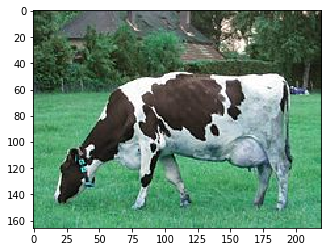

In [25]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/predictions/220px-Koe-in-weiland-bij-Gorssel.JPG')
plt.imshow(img)

# Model 3 CNN

In [26]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu", dilation_rate = (1,1)))
model.add(MaxPooling2D(pool_size=2))

from keras import regularizers
model.add(Dense(6, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))


model.add(Dense(6, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

model.add(Flatten())
model.add(Dense(6,activation="softmax"))
model.add(Dense(6,
                kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4128      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 32)        4128      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
dense_6 (Dense)              (None, 18, 18, 6)         198       
__________

In [27]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
model.save('model2.h5')

In [28]:
NAME = "Test2".format(int(time.time()))
tensorboard = TensorBoard(log_dir='C://Users/aayus/logs/{}'.format(NAME),write_grads=True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.30)
sess = tf.Session(config=tf.ConfigProto(gpu_options = gpu_options))

In [29]:
model.fit_generator(train_set,steps_per_epoch=20,epochs=3,validation_data=test_set,validation_steps=50,callbacks=[tensorboard])

Epoch 1/3
 7/20 [=========>....................] - ETA: 31s - loss: 138.4899 - acc: 0.2257

C:\Users\aayus\Anaconda3\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


20/20 [==============================] - 115s 6s/step - loss: 80.2572 - acc: 0.1887 - val_loss: 30.4986 - val_acc: 0.1649
Epoch 2/3
20/20 [==============================] - 117s 6s/step - loss: 23.1945 - acc: 0.1548 - val_loss: 19.1304 - val_acc: 0.1649
Epoch 3/3
20/20 [==============================] - 109s 5s/step - loss: 17.8116 - acc: 0.1807 - val_loss: 16.2220 - val_acc: 0.1648


# Predictions

In [55]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Elephant/01-tuskless-elephant-elephantvoices-img-6734-processed-ngsve.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[5]


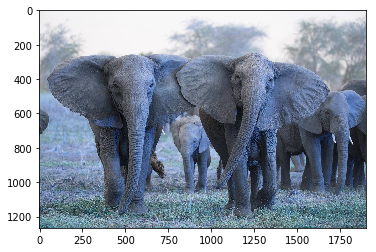

In [56]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Elephant/01-tuskless-elephant-elephantvoices-img-6734-processed-ngsve.jpg')
plt.imshow(img)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Elephant/Elephant_3.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[3]


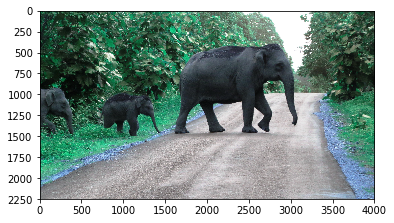

In [63]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Elephant/Elephant_3.jpg')
plt.imshow(img)

In [77]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Wolf/920x920.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[5]


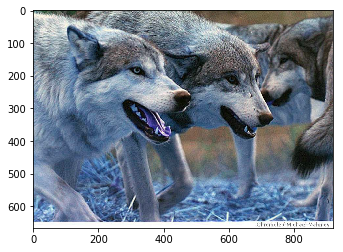

In [78]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Wolf/920x920.jpg')
plt.imshow(img)

In [173]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Tiger/Bengal-Tiger-8-9-2012-Hero-and-Circle-XL-257678.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[4]


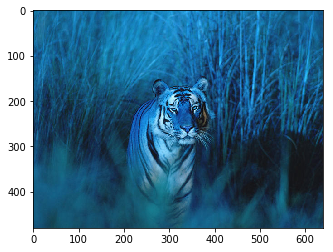

In [90]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Tiger/Bengal-Tiger-8-9-2012-Hero-and-Circle-XL-257678.jpg')
plt.imshow(img)

In [94]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Tiger/bengal-tiger.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[0]


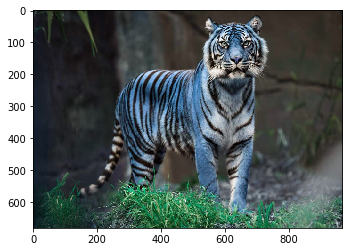

In [95]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Tiger/bengal-tiger.jpg')
plt.imshow(img)

In [105]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Kangaroo/Kangaroo-5-650x425.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[3]


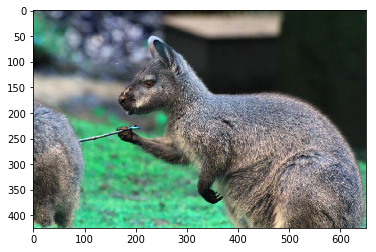

In [106]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Kangaroo/Kangaroo-5-650x425.jpg')
plt.imshow(img)

In [110]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Kangaroo/EASTERN-grey-kangaraoo-joey-250718mwlowwmtext-min.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[4]


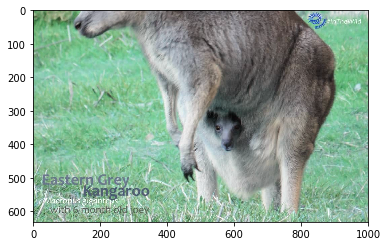

In [111]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Kangaroo/EASTERN-grey-kangaraoo-joey-250718mwlowwmtext-min.jpg')
plt.imshow(img)

In [155]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('model1.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Deer/Deer_22.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)
print(classes)

[3]


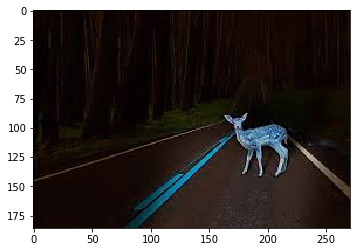

In [156]:
img = cv2.imread('C://Users/aayus/Downloads/DSP/Training/Deer/Deer_22.jpg')
plt.imshow(img)

# Inferences:

1)Model 2 performed the best for us with an accuracy of 75 Percent.







2)Regardless of noise, the model is classifying animals accurately.
    

# Challenges:

1)When there are animals at certain angels, the model fails to classify them.







2)With increase in data, the model is taking a lot of computational time.

# Business Proposal:

1)Integration of our model into automated cars.







2)Analyzing, how much resources can be saved after implementation.  